In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
energydata = pd.DataFrame.from_csv('./energydata_complete.csv', index_col=None, encoding="utf-8")
energydata["date"] = pd.to_datetime(energydata.date)
energydata["consumedE"] = energydata["Appliances"]+energydata["lights"]
energydata = energydata[(energydata.date>=pd.to_datetime("2016-01-12")) & (energydata.date<pd.to_datetime("2016-05-27"))]
#energydata.head()

In [3]:
countsperday = int(energydata.date.groupby(energydata.date.dt.date).count().head(1).values)

In [4]:
df= energydata.set_index("date")

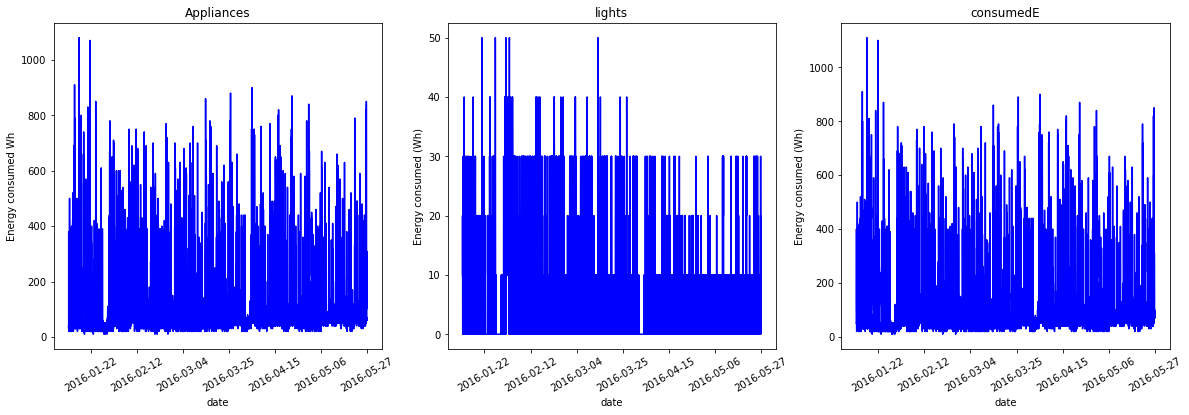

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=30)
axes[0].plot(energydata.date, energydata.Appliances, 'b')
axes[0].set_xlabel('date')
axes[0].set_ylabel('Energy consumed Wh')
axes[0].set_title('Appliances')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=30)
axes[1].plot(energydata.date, energydata.lights, 'b')
axes[1].set_xlabel('date')
axes[1].set_ylabel('Energy consumed (Wh)')
axes[1].set_title('lights')

plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=30)
axes[2].plot(energydata.date, energydata.consumedE, 'b')
axes[2].set_xlabel('date')
axes[2].set_ylabel('Energy consumed (Wh)')
axes[2].set_title('consumedE')

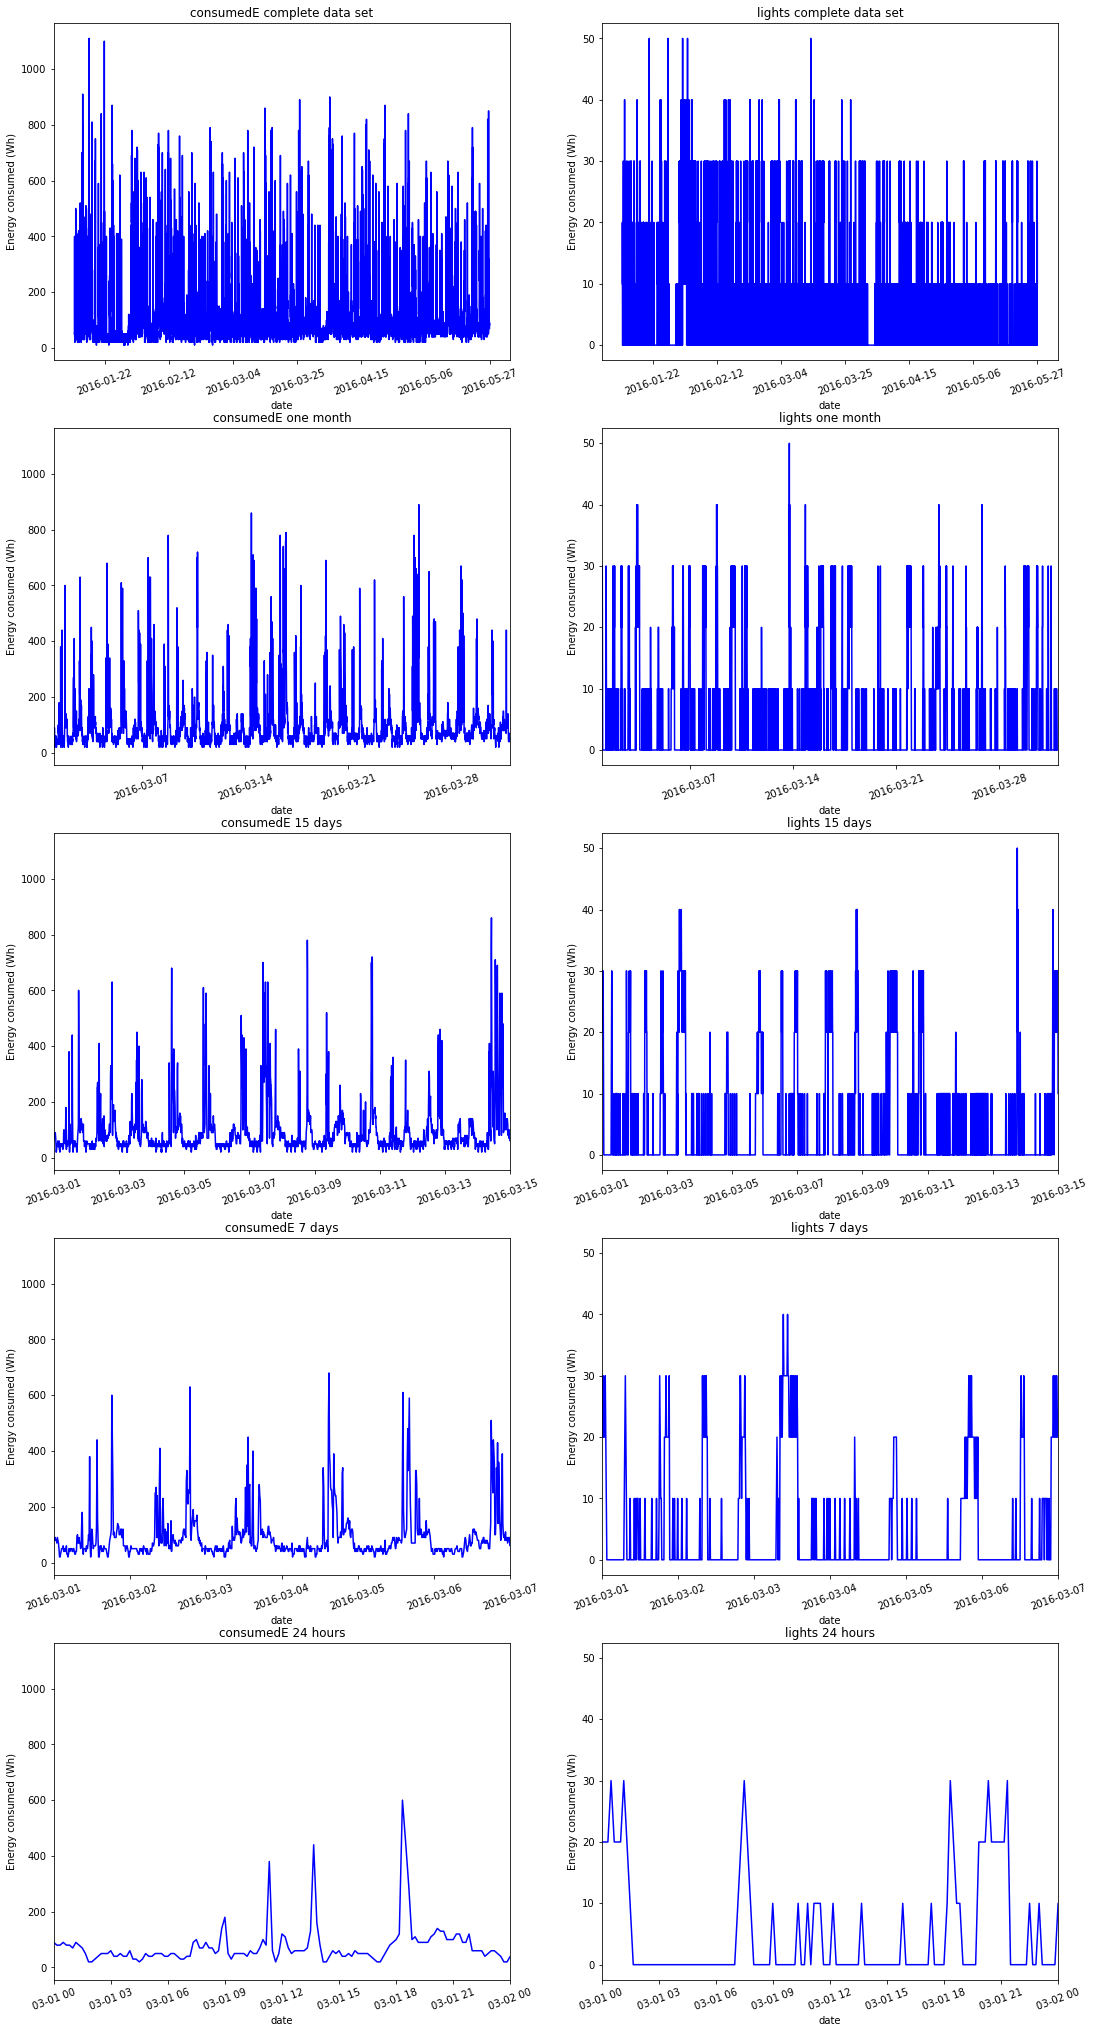

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 36))

plt.setp(axes[0,0].xaxis.get_majorticklabels(), rotation=20)
axes[0,0].plot(energydata.date, energydata.consumedE, 'b')
axes[0,0].set_xlabel('date')
axes[0,0].set_ylabel('Energy consumed (Wh)')
axes[0,0].set_title('consumedE complete data set')

plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=20)
axes[1,0].plot(energydata.date, energydata.consumedE, 'b')
axes[1,0].set_xlim(pd.Timestamp('2016-03-01'), pd.Timestamp('2016-04-01'))
axes[1,0].set_xlabel('date')
axes[1,0].set_ylabel('Energy consumed (Wh)')
axes[1,0].set_title('consumedE one month')

plt.setp(axes[2,0].xaxis.get_majorticklabels(), rotation=20)
axes[2,0].plot(energydata.date, energydata.consumedE, 'b')
axes[2,0].set_xlim(pd.Timestamp('2016-03-01'), pd.Timestamp('2016-03-15'))
axes[2,0].set_xlabel('date')
axes[2,0].set_ylabel('Energy consumed (Wh)')
axes[2,0].set_title('consumedE 15 days')

plt.setp(axes[3,0].xaxis.get_majorticklabels(), rotation=20)
axes[3,0].plot(energydata.date, energydata.consumedE, 'b')
axes[3,0].set_xlim(pd.Timestamp('2016-03-01'), pd.Timestamp('2016-03-07'))
axes[3,0].set_xlabel('date')
axes[3,0].set_ylabel('Energy consumed (Wh)')
axes[3,0].set_title('consumedE 7 days')

plt.setp(axes[4,0].xaxis.get_majorticklabels(), rotation=20)
axes[4,0].plot(energydata.date, energydata.consumedE, 'b')
axes[4,0].set_xlim(pd.Timestamp('2016-03-01'), pd.Timestamp('2016-03-02'))
axes[4,0].set_xlabel('date')
axes[4,0].set_ylabel('Energy consumed (Wh)')
axes[4,0].set_title('consumedE 24 hours')


plt.setp(axes[0,1].xaxis.get_majorticklabels(), rotation=20)
axes[0,1].plot(energydata.date, energydata.lights, 'b')
axes[0,1].set_xlabel('date')
axes[0,1].set_ylabel('Energy consumed (Wh)')
axes[0,1].set_title('lights complete data set')

plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=20)
axes[1,1].plot(energydata.date, energydata.lights, 'b')
axes[1,1].set_xlim(pd.Timestamp('2016-03-01'), pd.Timestamp('2016-04-01'))
axes[1,1].set_xlabel('date')
axes[1,1].set_ylabel('Energy consumed (Wh)')
axes[1,1].set_title('lights one month')

plt.setp(axes[2,1].xaxis.get_majorticklabels(), rotation=20)
axes[2,1].plot(energydata.date, energydata.lights, 'b')
axes[2,1].set_xlim(pd.Timestamp('2016-03-01'), pd.Timestamp('2016-03-15'))
axes[2,1].set_xlabel('date')
axes[2,1].set_ylabel('Energy consumed (Wh)')
axes[2,1].set_title('lights 15 days')

plt.setp(axes[3,1].xaxis.get_majorticklabels(), rotation=20)
axes[3,1].plot(energydata.date, energydata.lights, 'b')
axes[3,1].set_xlim(pd.Timestamp('2016-03-01'), pd.Timestamp('2016-03-07'))
axes[3,1].set_xlabel('date')
axes[3,1].set_ylabel('Energy consumed (Wh)')
axes[3,1].set_title('lights 7 days')

plt.setp(axes[4,1].xaxis.get_majorticklabels(), rotation=20)
axes[4,1].plot(energydata.date, energydata.lights, 'b')
axes[4,1].set_xlim(pd.Timestamp('2016-03-01'), pd.Timestamp('2016-03-02'))
axes[4,1].set_xlabel('date')
axes[4,1].set_ylabel('Energy consumed (Wh)')
axes[4,1].set_title('lights 24 hours')

Now I have to determine if the time series is stationary. To do that, I will use the Dickey-Fuller test.

# 1. Dickey-Fuller Test

In [7]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,counts):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=counts)
    rolstd = pd.rolling_std(timeseries, window=counts)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\soloc\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=144,center=False).mean()
  
C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=144,center=False).std()
  import sys


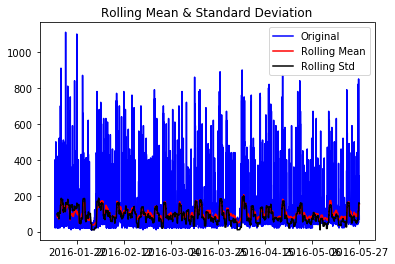

Results of Dickey-Fuller Test:
Test Statistic                   -21.316949
p-value                            0.000000
#Lags Used                        11.000000
Number of Observations Used    19572.000000
Critical Value (1%)               -3.430684
Critical Value (5%)               -2.861688
Critical Value (10%)              -2.566849
dtype: float64


In [8]:
test_stationarity(df.consumedE,int(countsperday))

If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

The result shows me that apparently this time series is stationary, however I will do more test to prove it.

## 1.1 Energy consumed every day.

In [9]:
dfdate = energydata.groupby(energydata.date.dt.date).sum()

C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  
C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  import sys


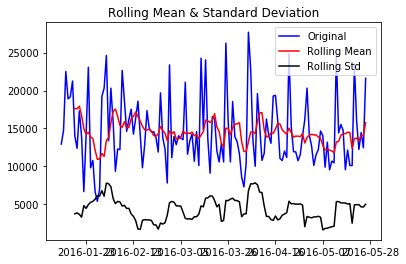

Results of Dickey-Fuller Test:
Test Statistic                -7.677279e+00
p-value                        1.536850e-11
#Lags Used                     2.000000e+00
Number of Observations Used    1.330000e+02
Critical Value (1%)           -3.480500e+00
Critical Value (5%)           -2.883528e+00
Critical Value (10%)          -2.578496e+00
dtype: float64


In [10]:
test_stationarity(dfdate.consumedE,7)#averaged every week

Here I also get as a result a stationary time series.

## 1.2 Log scale

In order to distinguish easily the differences, I will make use of log scale

In [11]:
df_log = np.log(dfdate)

C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


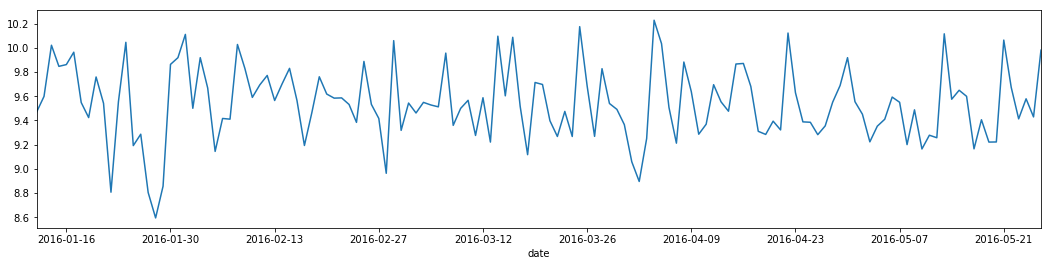

In [12]:
df_log.consumedE.plot(figsize=(18, 4))

## 1.3 Moving average

In this approach, I take average of ‘k’ consecutive values depending on the frequency of time series. I will take the avergage over one day.

C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()
  """Entry point for launching an IPython kernel.


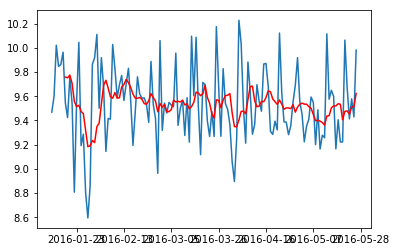

In [13]:
moving_avg = pd.rolling_mean(df_log,7)
plt.plot(df_log.consumedE)
plt.plot(moving_avg.consumedE, color='red')

I can use again the Dickey-Fuller test

C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  
C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  import sys


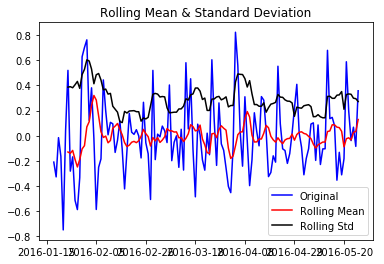

Results of Dickey-Fuller Test:
Test Statistic                -7.538678e+00
p-value                        3.423939e-11
#Lags Used                     5.000000e+00
Number of Observations Used    1.240000e+02
Critical Value (1%)           -3.484220e+00
Critical Value (5%)           -2.885145e+00
Critical Value (10%)          -2.579359e+00
dtype: float64


In [14]:
df_log_moving_avg_diff = df_log.consumedE - moving_avg.consumedE
df_log_moving_avg_diff.head(7)
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff,7)

## 1.4 Exponentially weighted moving average

In the moving average approach the time-period has to be strictly defined. In complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


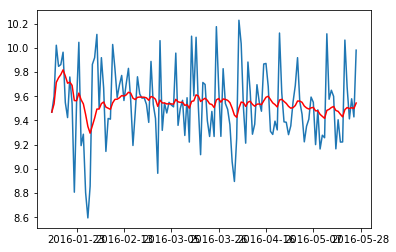

In [15]:
expwighted_avg = pd.ewma(df_log, halflife=7)
plt.plot(df_log.consumedE)
plt.plot(expwighted_avg.consumedE, color='red')

Again, I can perform the Dickey-Fuller test to see the differences.

C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  
C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  import sys


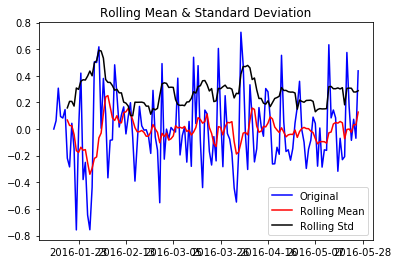

Results of Dickey-Fuller Test:
Test Statistic                -7.607784e+00
p-value                        2.297652e-11
#Lags Used                     2.000000e+00
Number of Observations Used    1.330000e+02
Critical Value (1%)           -3.480500e+00
Critical Value (5%)           -2.883528e+00
Critical Value (10%)          -2.578496e+00
dtype: float64


In [16]:
df_log_ewma_diff = df_log.consumedE - expwighted_avg.consumedE
test_stationarity(df_log_ewma_diff,7)

# 2 Eliminating Trend and Seasonality

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Here i will discuss two approaces to remove trend and seasonality.

## 2.1 Differencing

In this technique, we take the difference of the observation at a particular instant with that at the previous instant.

In [17]:
df_log_diff = df_log.consumedE - df_log.consumedE.shift(7)
df_log_diff.dropna(inplace=True)
#df_log_diff.plot()

I will make use of the Dickey-Fuller test to see the changes with respect to the previous methods.

C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  
C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  import sys


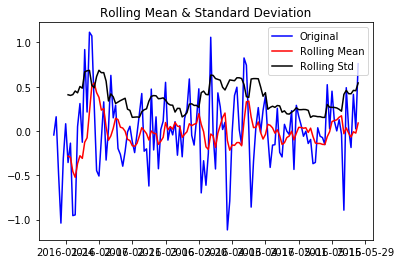

Results of Dickey-Fuller Test:
Test Statistic                  -4.838132
p-value                          0.000046
#Lags Used                      13.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


In [18]:
test_stationarity(df_log_diff,7)

### 2.1.1 Differencing again

In [26]:
df_log_diff_diff = df_log_diff - df_log_diff.shift(7)
df_log_diff_diff.dropna(inplace=True)

C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  
C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  import sys


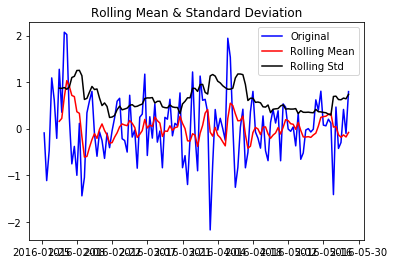

Results of Dickey-Fuller Test:
Test Statistic                -5.793955e+00
p-value                        4.800106e-07
#Lags Used                     1.300000e+01
Number of Observations Used    1.080000e+02
Critical Value (1%)           -3.492401e+00
Critical Value (5%)           -2.888697e+00
Critical Value (10%)          -2.581255e+00
dtype: float64


In [27]:
test_stationarity(df_log_diff_diff,7)

## 2.2 Decomposing

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
df_log.reset_index(inplace=True)
df_log['date'] = pd.to_datetime(df_log['date'])
df_log = df_log.set_index('date')

decomposition = seasonal_decompose(df_log.consumedE.to_frame(),freq=7)

In [21]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

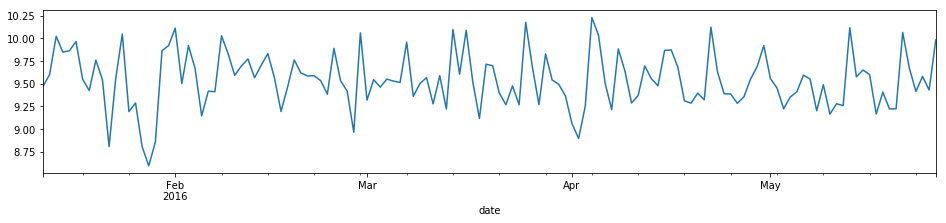

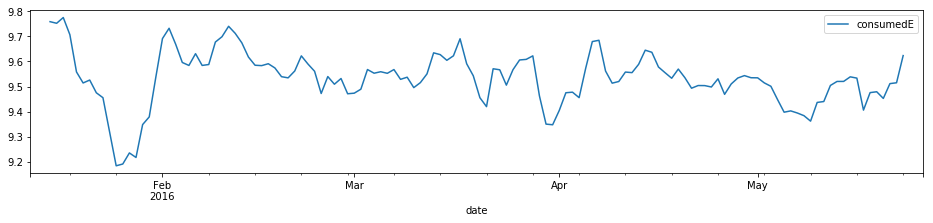

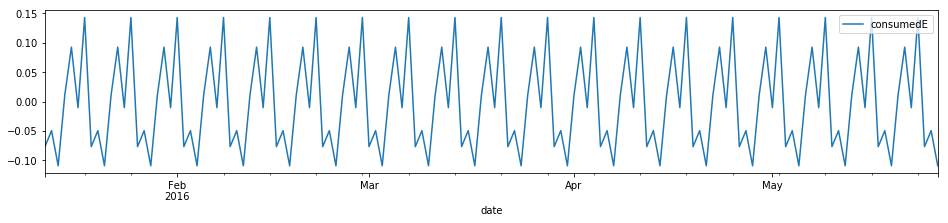

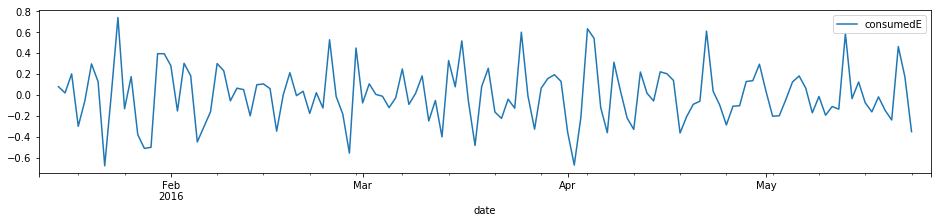

In [22]:
df_log.consumedE.plot(figsize=(16, 3))
trend.plot(figsize=(16, 3))
seasonal.plot(figsize=(16, 3))
residual.plot(figsize=(16, 3))

In [23]:
seasonindex = seasonal.reset_index()

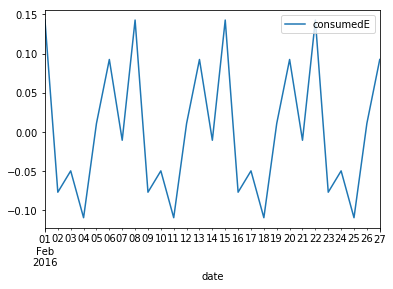

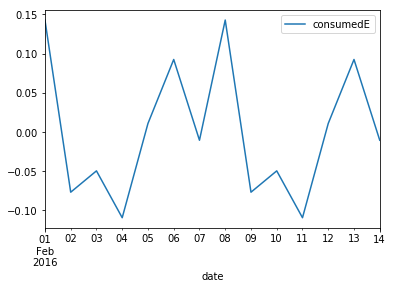

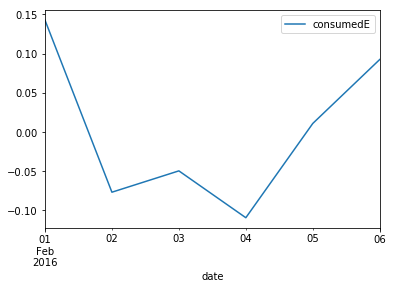

In [24]:
seasonindex[(seasonindex.date>=pd.to_datetime("2016-02-01")) & (seasonindex.date<pd.to_datetime("2016-02-28"))].plot(x="date",y="consumedE")
seasonindex[(seasonindex.date>=pd.to_datetime("2016-02-01")) & (seasonindex.date<pd.to_datetime("2016-02-15"))].plot(x="date",y="consumedE")
seasonindex[(seasonindex.date>=pd.to_datetime("2016-02-01")) & (seasonindex.date<pd.to_datetime("2016-02-7"))].plot(x="date",y="consumedE")

Here, it is clear that we have separated the trend, the seasonality and we have the residual. Now let us see the behavior of the residual by using the Dickey-Fuller test.

C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  
C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  import sys


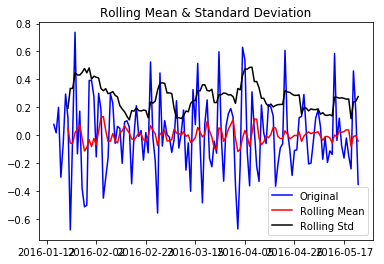

Results of Dickey-Fuller Test:
Test Statistic                -6.812324e+00
p-value                        2.100945e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64


In [25]:
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
test_stationarity(df_log_decompose.consumedE, 7)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary.

# 3 Forecasting a Time Series

In [28]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

I will use ARIMA to forecast the time series. I will use the df_log_diff and the df_log_decompose

## 3.1 df_log_decompose

In [54]:
#df_log_ewma_diff = df_log.consumedE - expwighted_avg.consumedE
lag_acf = acf(df_log_diff_diff, nlags=7)
lag_pacf = pacf(df_log_diff_diff, nlags=7, method='ols')

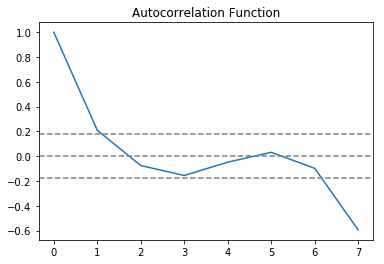

In [55]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#plt.ylim((-0.2,0.2))
#plt.xlim((0.0,100))

(-1, 1)

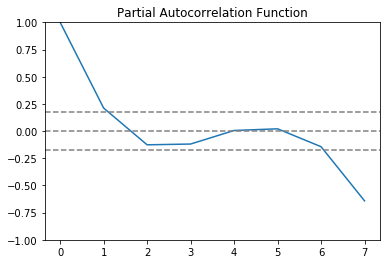

In [56]:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.ylim((-1,1))
#plt.xlim((0.0,10))

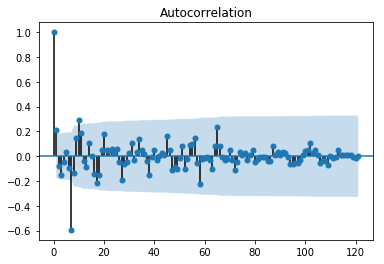

In [57]:
plot_acf(df_log_diff_diff);

In [62]:
p=1
d=2
q=1

In [63]:
model = ARIMA(df_log.consumedE, order=(p, d, q))  
results_AR = model.fit()  

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

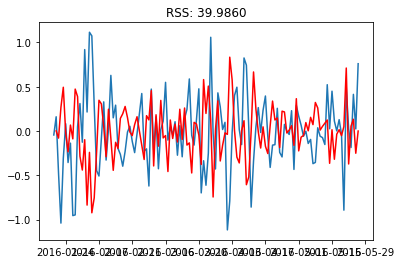

In [162]:
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum(( (results_AR.fittedvalues-df_log_diff).dropna())**2))

## 3.1 df_log_decompose

In [39]:
#df_log_ewma_diff = df_log.consumedE - expwighted_avg.consumedE
lag_acf = acf(df_log_decompose, nlags=7)
lag_pacf = pacf(df_log_decompose, nlags=7, method='ols')

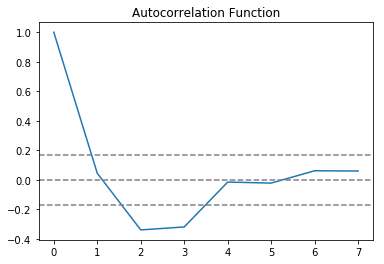

In [40]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_decompose)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_decompose)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#plt.ylim((-0.2,0.2))
#plt.xlim((0.0,100))

(-1, 1)

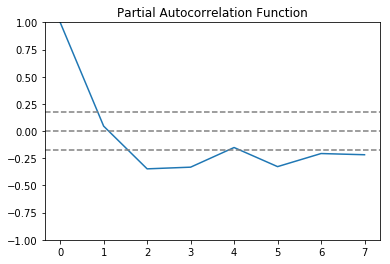

In [41]:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_decompose)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_decompose)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.ylim((-1,1))
#plt.xlim((0.0,10))

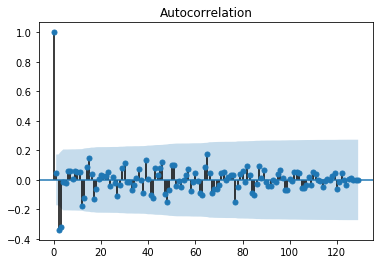

In [43]:
plot_acf(df_log_decompose);

In [67]:
p=1
d=1
q=1

In [68]:
model = ARIMA(df_log.consumedE, order=(p, d, q))  
results_AR = model.fit()  

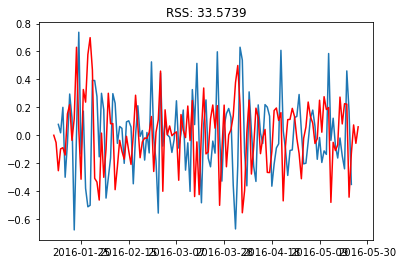

In [69]:
plt.plot(df_log_decompose)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum(( (results_AR.fittedvalues-df_log_diff).dropna())**2))

In [70]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
#predictions_ARIMA_diff.head()

In [71]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [72]:
predictions_ARIMA_log = pd.Series(df_log.ix[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

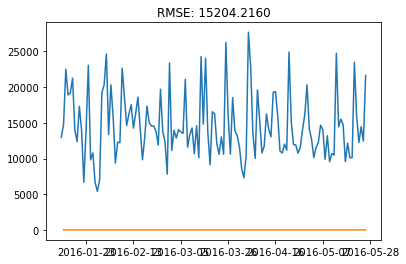

In [76]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dfdate.consumedE)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dfdate.consumedE).dropna()**2)/len(df_log)))